## Alexis Price
### Assignment 4

In [1]:
#import packages
import pandas as pd
import numpy as np
from sklearn import linear_model
from matplotlib import pyplot as plt

In [2]:
#----- number 1------
# read in & display data types

data = pd.read_csv('titanic.csv')
data[0:5]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [4]:
#----- number 2------
# drop columns & make survived the last column

dataClean = data.drop(['PassengerId','Name','Ticket','Cabin','Embarked'], axis = 1)
cols = dataClean.columns.tolist()
dataClean2 = dataClean[cols[1:]+cols[:1]]
cols = dataClean2.columns.tolist()
dataClean2

,Pclass,Sex,Age,SibSp,Parch,Fare,Survived
0,3,male,22.0,1,0,7.2500,0
1,1,female,38.0,1,0,71.2833,1
2,3,female,26.0,0,0,7.9250,1
3,1,female,35.0,1,0,53.1000,1
4,3,male,35.0,0,0,8.0500,0
...,...,...,...,...,...,...,...
886,2,male,27.0,0,0,13.0000,0
887,1,female,19.0,0,0,30.0000,1
888,3,female,NaN,1,2,23.4500,0
889,1,male,26.0,0,0,30.0000,1


In [5]:
#----- number 3 & 4------
# convert sex to int value & display

dataClean2['Sex'] = (dataClean2['Sex'] == 'male').astype(int)
dataClean2[0:5]

,Pclass,Sex,Age,SibSp,Parch,Fare,Survived
0,3,1,22.0,1,0,7.2500,0
1,1,0,38.0,1,0,71.2833,1
2,3,0,26.0,0,0,7.9250,1
3,1,0,35.0,1,0,53.1000,1
4,3,1,35.0,0,0,8.0500,0


In [6]:
#----- number 5------
# confirm sex changed to int

dataClean2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Pclass    891 non-null    int64  
 1   Sex       891 non-null    int64  
 2   Age       714 non-null    float64
 3   SibSp     891 non-null    int64  
 4   Parch     891 non-null    int64  
 5   Fare      891 non-null    float64
 6   Survived  891 non-null    int64  
dtypes: float64(2), int64(5)
memory usage: 48.9 KB


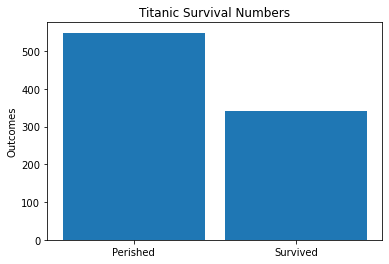

In [7]:
#----- number 6------
# bar chart of outcomes

counts = dataClean2['Survived'].value_counts()
w=.35
plt.bar(x=[0,.4], height=counts, width=w)
plt.xticks([0,.4],('Perished','Survived'))
plt.ylabel("Outcomes")
plt.title("Titanic Survival Numbers")
plt.show()

In [8]:
#----- number 7------
# compute & display the mean of each feature
dataClean2.mean()

Pclass       2.308642
Sex          0.647587
Age         29.699118
SibSp        0.523008
Parch        0.381594
Fare        32.204208
Survived     0.383838
dtype: float64

In [9]:
#----- number 8------
# compute & display mean of each feature grouped by outcome

dataClean2.groupby(dataClean2['Survived']).mean()

,Pclass,Sex,Age,SibSp,Parch,Fare
Survived,,,,,,
0,2.531876,0.852459,30.626179,0.553734,0.329690,22.117887
1,1.950292,0.318713,28.343690,0.473684,0.464912,48.395408


In [10]:
# creating dataframes by outcome
totalPassengers = dataClean2.drop(['Survived'], axis = 1)
survived = dataClean2[dataClean2['Survived']==1]
survived = survived.drop(['Survived'], axis=1)
perished = dataClean2[dataClean2['Survived']==0]
perished = perished.drop(['Survived'], axis=1)

<function matplotlib.pyplot.show(*args, **kw)>

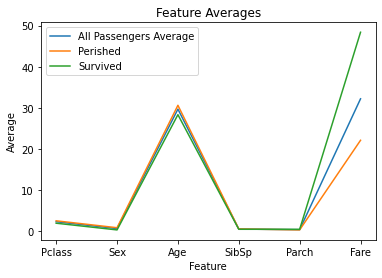

In [11]:
#----- number 9------
# plot line graph of averages

cols1 = cols[:6]
x = cols1
y1 = totalPassengers.mean()
y2 = perished.mean()
y3 = survived.mean()
plt.plot(x, y1, label='All Passengers Average')
plt.plot(x, y2, label='Perished')
plt.plot(x, y3, label='Survived')
plt.ylabel("Average")
plt.xlabel("Feature")
plt.title("Feature Averages")
plt.legend()
plt.show

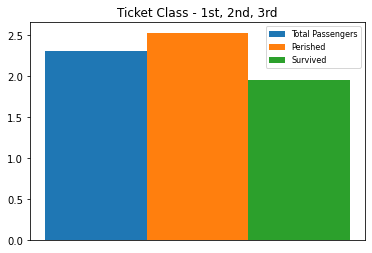

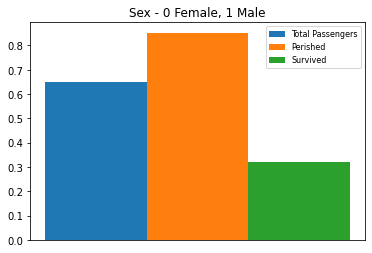

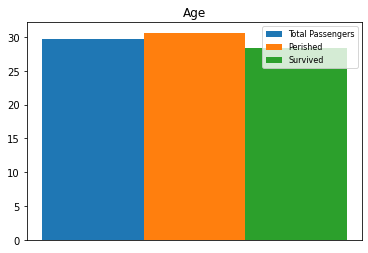

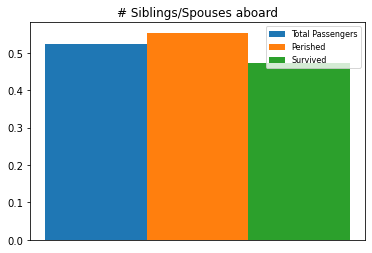

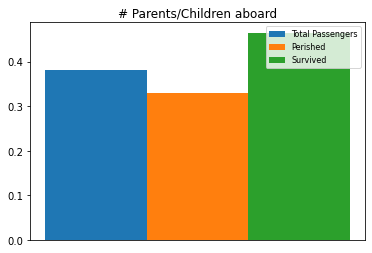

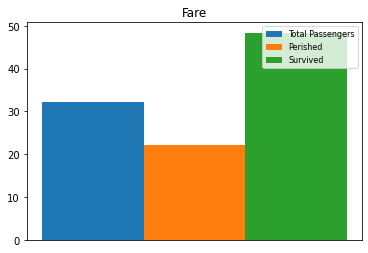

In [12]:
#----- number 10------
# display feature averages in bar chart series

titles = ['Ticket Class - 1st, 2nd, 3rd','Sex - 0 Female, 1 Male','Age','# Siblings/Spouses aboard','# Parents/Children aboard','Fare']
i=0
for col in cols1:
    x = np.arange(1)  
    width = 0.35 
    
    fig, ax = plt.subplots()
    rects1 = ax.bar(x+0, totalPassengers[col].mean(), width, label='Total Passengers')
    rects2 = ax.bar(x+.35, perished[col].mean(), width, label='Perished')
    rects3 = ax.bar(x+.70, survived[col].mean(), width, label='Survived')

    ax.set_title(titles[i])
    i+=1
    ax.set_xticks([])
    plt.legend(loc=1, prop={'size': 8})
    plt.show()

In [13]:
#----- number 11------
# compute & display correlation between each feature & dependent variable

correl = dataClean2.corr()
correl = correl['Survived']
print(correl)

Pclass     -0.338481
Sex        -0.543351
Age        -0.077221
SibSp      -0.035322
Parch       0.081629
Fare        0.257307
Survived    1.000000
Name: Survived, dtype: float64


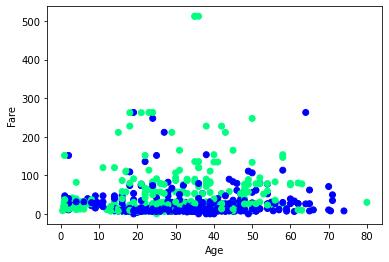

In [14]:
#----- number 12------
# scatterplot of age & fare

plt.scatter(x=dataClean2['Age'], y=dataClean2['Fare'], c=dataClean2['Survived'], cmap='winter')
plt.ylabel('Fare')
plt.xlabel('Age')
plt.show()